<a href="https://colab.research.google.com/github/Orri050/Lokaverkefni/blob/main/Lokaverkefni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forritið

## Grunnur

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install plotly

In [3]:
import tensorflow as tf
import math
from pandas.tseries.offsets import DateOffset
from datetime import timedelta, date
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import datetime as dt
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit



## Val á hlutabréfi

In [225]:
choice = input('Write a stock symbol:')
choice = choice.upper()

Write a stock symbol:TWTR


In [ ]:
#islenskt=input('Íslenskt? (1 já), (0 nei):')
#islenskt = islenskt.upper()

## Hlutabréf gögn

In [226]:
data = yf.download(tickers=choice, start="2019-03-04", end="2022-04-18", interval='1d')
#data = yf.download(tickers=choice, period = 'max', interval = '1d', rounding= True)

[*********************100%***********************]  1 of 1 completed


In [227]:
data_Open=data[['Open']] #this returns a DataFrame, you don't need loc
data_dates=data.index.to_frame().reset_index(drop=True)
data_dates=data_dates.apply(pd.to_datetime)

### yf.ticker 

In [228]:
yf.pdr_override()
stock = yf.Ticker(choice)

In [229]:
stockh = stock.history(period='max',start="2019-03-04",end="2022-04-18", interval='1d')
#stockh = stock.history(period='max', interval='1d')
stockh

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-04,30.780001,31.260000,30.070000,30.500000,15920400,0,0
2019-03-05,30.500000,31.230000,30.389999,31.030001,13073500,0,0
2019-03-06,30.940001,31.340000,30.590000,30.799999,10938600,0,0
2019-03-07,30.760000,30.840000,30.010000,30.120001,15779900,0,0
2019-03-08,29.639999,30.209999,29.410000,30.040001,11964300,0,0
...,...,...,...,...,...,...,...
2022-04-08,47.299999,48.439999,45.830002,46.230000,83262600,0,0
2022-04-11,45.750000,47.980000,44.709999,47.009998,117814000,0,0
2022-04-12,47.029999,47.549999,44.439999,44.480000,60794000,0,0


In [ ]:
#data.columns

In [ ]:
#stockh.index

In [232]:
stockh_Open=stockh[['Open']] #this returns a DataFrame, you don't need loc
stockh_dates=stockh.index.to_frame().reset_index(drop=True)
stockh_dates=stockh_dates.apply(pd.to_datetime)

In [233]:
jon=stock.dividends
divi_dates=jon.index.to_frame().reset_index(drop=True)
divi_dates=divi_dates.apply(pd.to_datetime)
print(divi_dates)

Empty DataFrame
Columns: [Date]
Index: []


In [234]:
add_dates = [data.index[-1] + DateOffset(days=x) for x in range(0,32) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=data.columns)
#future_dates

## Open close

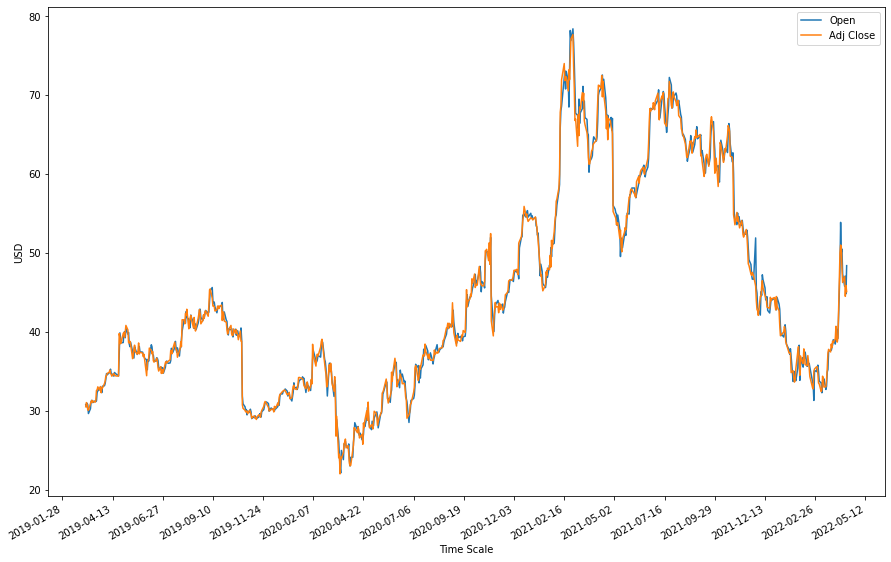

In [235]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=data_dates
plt.plot(x_dates, data['Open'], label='Open')
plt.plot(x_dates, data['Adj Close'], label='Adj Close')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## High low

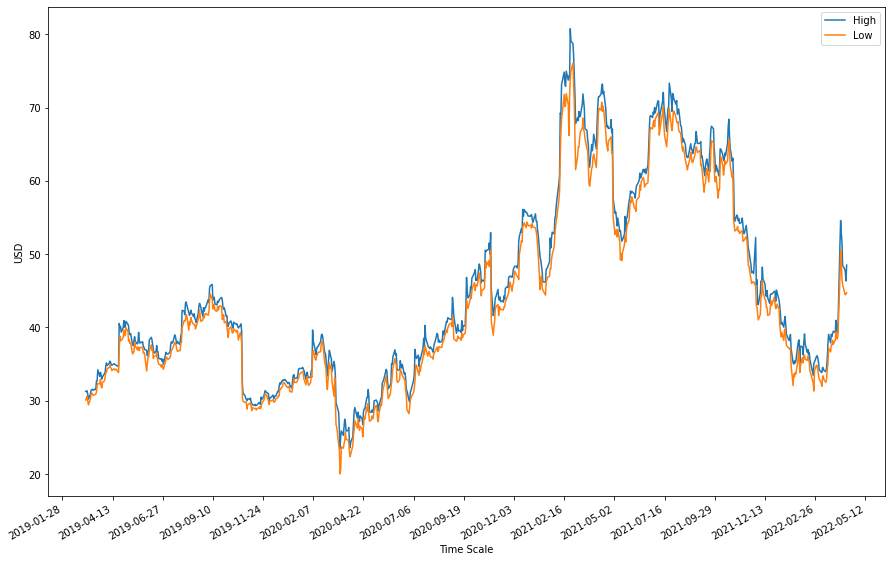

In [236]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=data_dates
plt.plot(x_dates, data['High'], label='High')
plt.plot(x_dates, data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Fyrsta módel

### Gagnaundirbúningur

In [237]:
target_y = data['Adj Close']
X_feat= data.iloc[:,0:5]
h_feat=data.iloc[:,4]

In [238]:
h_feat

Date
2019-03-04    30.500000
2019-03-05    31.030001
2019-03-06    30.799999
2019-03-07    30.120001
2019-03-08    30.040001
                ...    
2022-04-08    46.230000
2022-04-11    47.009998
2022-04-12    44.480000
2022-04-13    45.849998
2022-04-14    45.080002
Name: Adj Close, Length: 788, dtype: float64

In [239]:
X_feat

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-03-04,30.780001,31.260000,30.070000,30.500000,30.500000
2019-03-05,30.500000,31.230000,30.389999,31.030001,31.030001
2019-03-06,30.940001,31.340000,30.590000,30.799999,30.799999
2019-03-07,30.760000,30.840000,30.010000,30.120001,30.120001
2019-03-08,29.639999,30.209999,29.410000,30.040001,30.040001
...,...,...,...,...,...
2022-04-08,47.299999,48.439999,45.830002,46.230000,46.230000
2022-04-11,45.750000,47.980000,44.709999,47.009998,47.009998
2022-04-12,47.029999,47.549999,44.439999,44.480000,44.480000


In [240]:
h_ft=np.array(h_feat)
h_ft=h_ft.reshape(-1,1)

In [241]:
sc= StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft,index=X_feat.index)


In [242]:
h_ft=sc.fit_transform(h_ft)

In [243]:
def lstm_split(data, n_steps1):
  X, y=[], []
  for i in range(len(data)-n_steps1+1):
    X.append(data[i:i+n_steps1,:-1])
    y.append(data[i+n_steps1-1,-1])

  return np.array(X), np.array(y)


In [244]:
X11, y11= lstm_split(X_ft.values, n_steps1=1)

train_split=0.8
split_idx= int(np.ceil(len(X11)*train_split))
date_index=X_ft.index

Xtr1, Xtst1= X11[:split_idx], X11[split_idx:]
ytr1, ytst1= y11[:split_idx], y11[split_idx:]
Xtrd1, Xtstd1= date_index[:split_idx], date_index[split_idx:]

print(X11.shape, Xtr1.shape, Xtst1.shape, ytst1.shape)

(788, 1, 4) (631, 1, 4) (157, 1, 4) (157,)


### Modelið

In [245]:
model1 = keras.models.Sequential([
    keras.layers.LSTM(32,input_shape=(Xtr1.shape[1],Xtr1.shape[2]), activation="relu",return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1)])
model1.compile(loss="mean_squared_error", optimizer="adam")
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 1, 32)             4736      
                                                                 
 lstm_24 (LSTM)              (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


In [246]:
history1=model1.fit(Xtr1,ytr1,epochs=100,validation_data=(Xtst1, ytst1),batch_size=4,verbose=2,shuffle=False)

Epoch 1/100
158/158 - 4s - loss: 0.4917 - val_loss: 0.0133 - 4s/epoch - 25ms/step
Epoch 2/100
158/158 - 1s - loss: 0.0231 - val_loss: 0.0041 - 564ms/epoch - 4ms/step
Epoch 3/100
158/158 - 1s - loss: 0.0060 - val_loss: 0.0039 - 525ms/epoch - 3ms/step
Epoch 4/100
158/158 - 1s - loss: 0.0037 - val_loss: 0.0036 - 538ms/epoch - 3ms/step
Epoch 5/100
158/158 - 1s - loss: 0.0031 - val_loss: 0.0035 - 525ms/epoch - 3ms/step
Epoch 6/100
158/158 - 1s - loss: 0.0030 - val_loss: 0.0035 - 561ms/epoch - 4ms/step
Epoch 7/100
158/158 - 1s - loss: 0.0028 - val_loss: 0.0035 - 606ms/epoch - 4ms/step
Epoch 8/100
158/158 - 1s - loss: 0.0027 - val_loss: 0.0035 - 518ms/epoch - 3ms/step
Epoch 9/100
158/158 - 1s - loss: 0.0026 - val_loss: 0.0034 - 552ms/epoch - 3ms/step
Epoch 10/100
158/158 - 1s - loss: 0.0025 - val_loss: 0.0034 - 548ms/epoch - 3ms/step
Epoch 11/100
158/158 - 1s - loss: 0.0025 - val_loss: 0.0034 - 548ms/epoch - 3ms/step
Epoch 12/100
158/158 - 1s - loss: 0.0025 - val_loss: 0.0034 - 558ms/epoch - 

In [247]:
ypr=model1.predict(Xtst1)
#ypr=ypr.reshape(-1)

### Lærdómskúrva

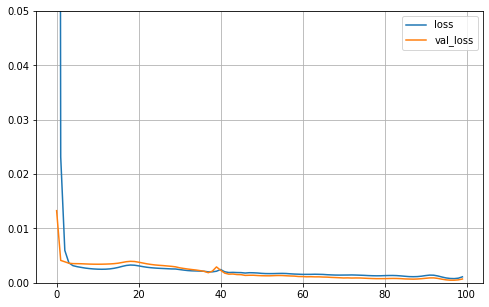

In [248]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.05)
plt.show()

### Samanburður á raunverulegu close og mati LSTM

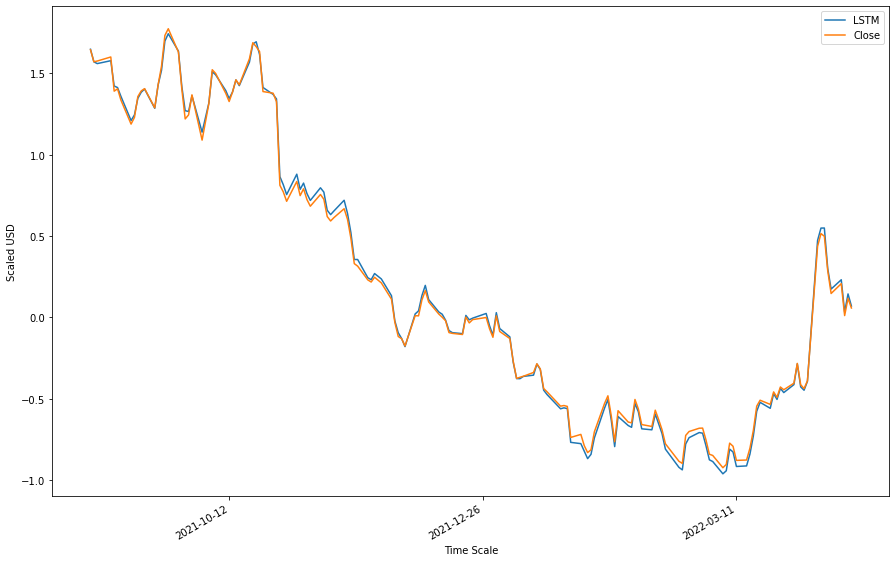

In [249]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr1)
x_dates=data_dates[k:]
#h=stockh['Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr, label='LSTM')
plt.plot(x_dates, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE VILLA

In [250]:
rmse=mean_squared_error(ytst1,ypr,squared=False)
mape=mean_absolute_percentage_error(ytst1,ypr)
print("RSME:",rmse)
print("MAPE:",mape)

RSME: 0.02637613001624437
MAPE: 1.2539965017881782


In [251]:
Villa1 = (rmse+mape)/2

## Annað módel

### Þjálfun á modeli

In [252]:
model2 = keras.models.Sequential([
    keras.layers.LSTM(50,input_shape=(Xtr1.shape[1],Xtr1.shape[2]),return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)])
model2.compile(loss="mean_squared_error", optimizer="adam")
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 1, 50)             11000     
                                                                 
 lstm_26 (LSTM)              (None, 1, 50)             20200     
                                                                 
 lstm_27 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [253]:
#history2=model2.fit(Xtr,ytr,epochs=100,batch_size=4,verbose=2,shuffle=False)

In [254]:
history2 = model2.fit(Xtr1, ytr1, epochs=100, batch_size=50, validation_data=(Xtst1, ytst1), verbose=2, shuffle=False)

Epoch 1/100
13/13 - 7s - loss: 1.0532 - val_loss: 0.7156 - 7s/epoch - 518ms/step
Epoch 2/100
13/13 - 0s - loss: 0.9576 - val_loss: 0.6387 - 105ms/epoch - 8ms/step
Epoch 3/100
13/13 - 0s - loss: 0.7829 - val_loss: 0.4734 - 88ms/epoch - 7ms/step
Epoch 4/100
13/13 - 0s - loss: 0.4706 - val_loss: 0.2067 - 107ms/epoch - 8ms/step
Epoch 5/100
13/13 - 0s - loss: 0.1288 - val_loss: 0.0101 - 97ms/epoch - 7ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0425 - val_loss: 0.0423 - 93ms/epoch - 7ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0156 - val_loss: 0.0144 - 98ms/epoch - 8ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0162 - val_loss: 0.0096 - 106ms/epoch - 8ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0140 - val_loss: 0.0119 - 114ms/epoch - 9ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0134 - val_loss: 0.0130 - 96ms/epoch - 7ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0128 - val_loss: 0.0113 - 106ms/epoch - 8ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0123 - val_loss: 0.0112 - 99ms/epoch - 8ms/step
Epoch 13/100
13/13 -

In [255]:
ypr2=model2.predict(Xtst1)
#ypr2=ypr2.reshape(-1)

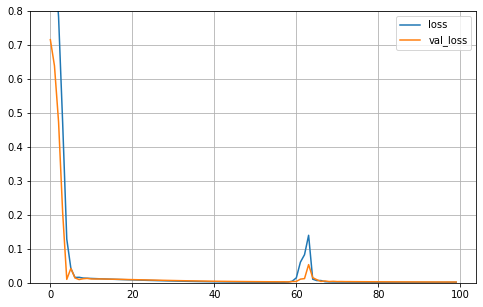

In [256]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.8)
plt.show()

### Samanburður á raunverulegu og LSTM

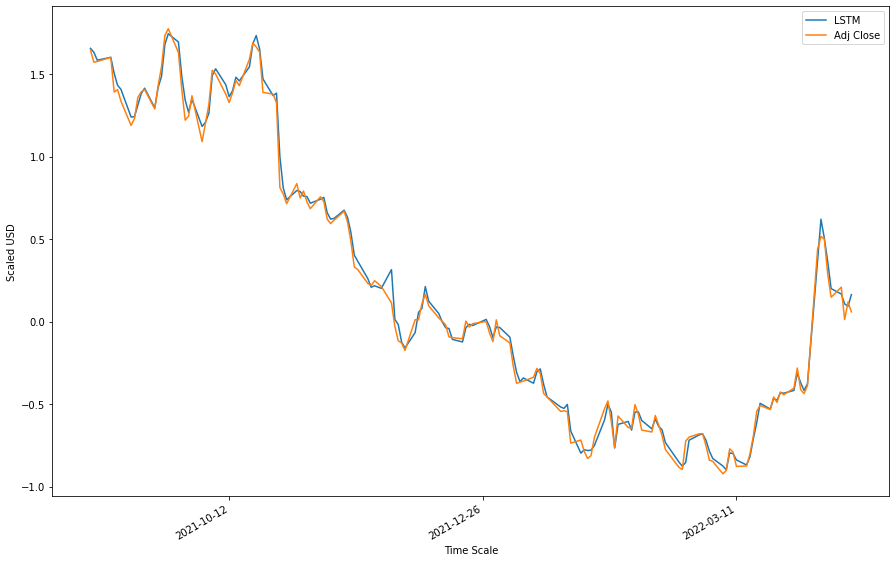

In [257]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr1)
x_dates=data_dates[k:]
#h=data['Adj Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr2, label='LSTM')
plt.plot(x_dates, h, label='Adj Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE VILLA

In [258]:
rmse2=mean_squared_error(ytst1,ypr2,squared=False)
mape2=mean_absolute_percentage_error(ytst1,ypr2)
print("RSME:",rmse2)
print("MAPE:",mape2)

RSME: 0.04883754499603721
MAPE: 0.9359456108982319


In [259]:
Villa2=(rmse2+mape2)/2

## Þriðja módel

### Þjálfun

In [260]:
n_steps1=10
X12, y12= lstm_split(X_ft.values, n_steps1=n_steps1)

train_split=0.8
split_idx= int(np.ceil(len(X12)*train_split))
date_index=X_ft.index

Xtr2, Xtst2= X12[:split_idx], X12[split_idx:]
ytr2, ytst2= y12[:split_idx], y12[split_idx:]
Xtrd2, Xtstd2= date_index[:split_idx], date_index[split_idx:-n_steps1+1]

print(X12.shape, Xtr2.shape, Xtst2.shape,Xtstd2.shape, ytst2.shape)

(779, 10, 4) (624, 10, 4) (155, 10, 4) (155,) (155,)


In [261]:
#model = Sequential()
#model.add(LSTM(50, return_sequences=True))
#model.add(Dropout(0.1))
#model.add(LSTM(50))
#model.add(Dropout(0.1))
#model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='adam')

In [262]:
#model3 = keras.models.Sequential([
    #keras.layers.LSTM(50,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    #keras.layers.LSTM(50,activation="relu"),
    #keras.layers.Dense(1)])
#model3.compile(loss="mean_squared_error", optimizer="adam")
#model3.summary()

In [263]:
#model3 = keras.models.Sequential([
    #keras.layers.LSTM(50,input_shape=(Xtr2.shape[1],Xtr2.shape[2]),return_sequences=True),
    #keras.layers.LSTM(50,return_sequences=True),
    #keras.layers.LSTM(50),
    #keras.layers.Dense(1)])
#model3.compile(loss="mean_squared_error", optimizer="adam")
#model3.summary()

In [264]:
model3 = keras.models.Sequential([
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(50),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)])
model3.compile(loss="mean_squared_error", optimizer="adam")

In [265]:
history3 = model3.fit(Xtr2, ytr2, epochs=100, batch_size=50, validation_data=(Xtst2, ytst2), verbose=2, shuffle=False)

Epoch 1/100
13/13 - 5s - loss: 0.4362 - val_loss: 0.1513 - 5s/epoch - 386ms/step
Epoch 2/100
13/13 - 0s - loss: 0.1839 - val_loss: 0.0852 - 204ms/epoch - 16ms/step
Epoch 3/100
13/13 - 0s - loss: 0.1046 - val_loss: 0.0688 - 206ms/epoch - 16ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0998 - val_loss: 0.0688 - 200ms/epoch - 15ms/step
Epoch 5/100
13/13 - 0s - loss: 0.1021 - val_loss: 0.0588 - 195ms/epoch - 15ms/step
Epoch 6/100
13/13 - 0s - loss: 0.1144 - val_loss: 0.0490 - 209ms/epoch - 16ms/step
Epoch 7/100
13/13 - 0s - loss: 0.1137 - val_loss: 0.0672 - 209ms/epoch - 16ms/step
Epoch 8/100
13/13 - 0s - loss: 0.1139 - val_loss: 0.0461 - 200ms/epoch - 15ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0837 - val_loss: 0.0728 - 197ms/epoch - 15ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0826 - val_loss: 0.0461 - 199ms/epoch - 15ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0699 - val_loss: 0.0580 - 209ms/epoch - 16ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0717 - val_loss: 0.0466 - 208ms/epoch - 16ms/step
Epo

In [266]:
#history3=model3.fit(Xtr2,ytr2,validation_data=(Xtst2,ytst2),epochs=100,batch_size=64,verbose=2)

In [267]:
ypr3=model3.predict(Xtst2)
#ypr3=ypr3.reshape(-1)

### Lærdómskúrva

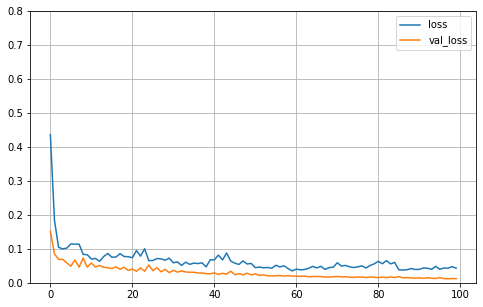

In [268]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.8)
plt.show()

### Samanburður

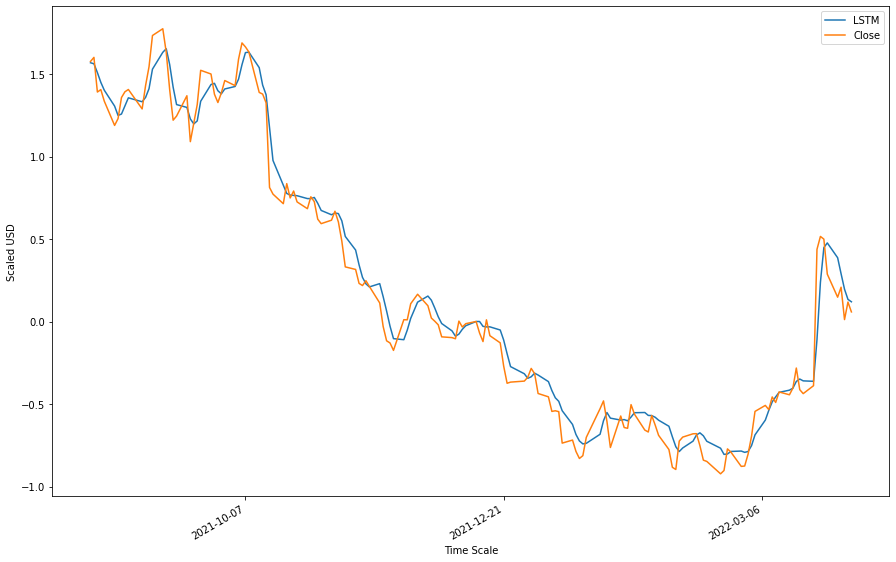

In [269]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr2)
thri=len(X12)-len(Xtstd2)
x_dates=data_dates[k:]
#h=stockh['Close']
n=n_steps1-1
h=h_ft[thri+n:]
#h=h[k:]
plt.plot(Xtstd2, ypr3, label='LSTM')
plt.plot(Xtstd2, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE

In [270]:
rmse3=mean_squared_error(ytst2,ypr3,squared=False)
mape3=mean_absolute_percentage_error(ytst2,ypr3)
print("RSME:",rmse3)
print("MAPE:",mape3)

RSME: 0.11059877256489753
MAPE: 1.0363588316105643


In [271]:
Villa3=(rmse3+mape3)/2

## MAPE

Test RMSE: 19.619
Test MAPE: 0.424


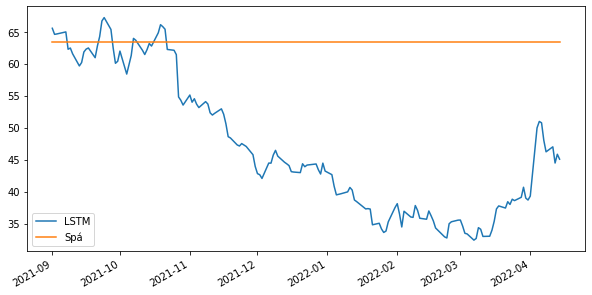

In [272]:
train_split=0.8
split_idx2= int(np.ceil(len(data)*train_split))
tr=data[['Adj Close']].iloc[:split_idx2]
tst=data[['Adj Close']].iloc[split_idx2:]

tstpr=np.array([tr.rolling(10).mean().iloc[-1]]*len(tst)).reshape((-1,1))

print('Test RMSE: %.3f'%mean_squared_error(tst,tstpr,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst,tstpr))
f=len(tst)-len(h)
z=n-f
x_dates=data_dates[k+z:]


plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst, label='LSTM')
plt.plot(x_dates, tstpr, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

Test RMSE: 20.091
Test MAPE: 0.435


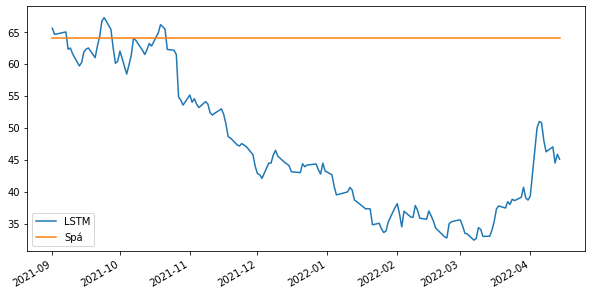

In [273]:
from statsmodels.tsa.api import SimpleExpSmoothing

J=data[['Adj Close']].values
train_split=0.8
split_idx3= int(np.ceil(len(J)*train_split))
tr2=J[:split_idx3]
tst2=J[split_idx3:]
tst_concat=np.array([]).reshape((0,1))

for i in range(len(tst2)):
  tr_fit=np.concatenate((tr2,np.asarray(tst_concat)))
  fit=SimpleExpSmoothing(np.asarray(tr_fit)).fit(smoothing_level=0.2)
  tst_pr=fit.forecast(1)
  tst_concat=np.concatenate((np.asarray(tst_concat),tst_pr.reshape((-1,1))))

print('Test RMSE: %.3f'%mean_squared_error(tst2,tst_concat,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst2,tst_concat))
f=len(tst2)-len(h)
z=n-f
x_dates=data_dates[k+z:]

plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst2, label='LSTM')
plt.plot(x_dates, tst_concat, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


## Val á modeli með minnstu villuna

In [274]:
smallest = 0
if Villa1 < Villa2 and Villa1 < Villa3 :
    smallest = 'Model1'
if Villa2 < Villa1 and Villa2 < Villa3 :
    smallest = 'Model2'
if Villa3 < Villa1 and Villa3 < Villa2 :
    smallest = 'Model3'
print(smallest, "er með minnstu samanlögðu meðalvilluna.")
print("Við veljum þá", smallest)

Model2 er með minnstu samanlögðu meðalvilluna.
Við veljum þá Model2


## fram í tímann

### val á gögnum

In [275]:
df1=data.reset_index()['Adj Close']
df1.shape

(788,)

### Mynd af gögnum sem voru valin

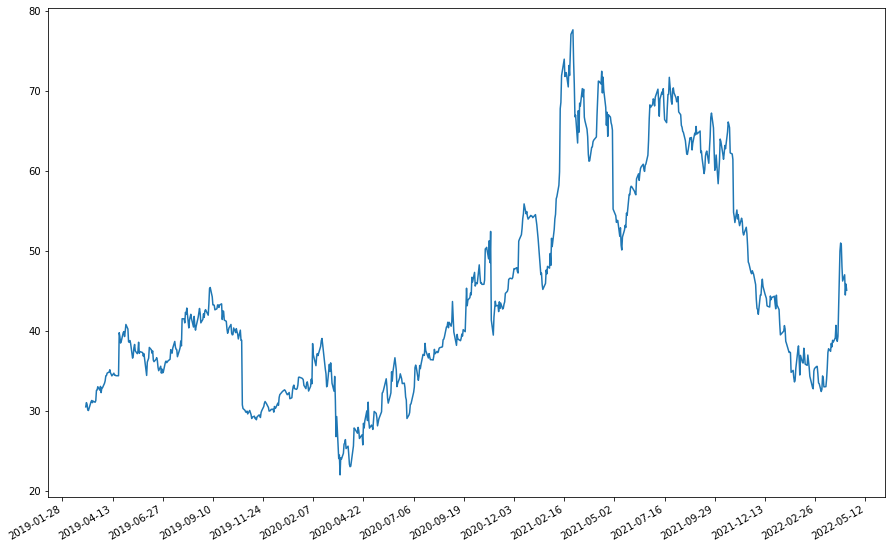

In [276]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
x_dates=data_dates
#plt.plot(df1)
plt.plot(x_dates, df1, label='Close')
plt.gcf().autofmt_xdate()

### Gagnavinnsla

In [277]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [278]:
#print(df1)

In [279]:
trainstaerd=int(len(df1)*0.65)
tststaerd=len(df1)-trainstaerd
train_data,test_data=df1[0:trainstaerd,:],df1[trainstaerd:len(df1),:1]

In [280]:
trainstaerd,tststaerd

(512, 276)

In [281]:
#train_data

In [282]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [283]:
time_step = 100
Xtr3, ytr3 = create_dataset(train_data, time_step)
Xtst3, ytst3 = create_dataset(test_data, time_step)

In [284]:
print(Xtr3.shape)
print(ytr3.shape)

(411, 100)
(411,)


In [285]:
print(Xtst3.shape), print(ytst3.shape)

(175, 100)
(175,)


(None, None)

In [286]:
Xtr3 =Xtr3.reshape(Xtr3.shape[0],Xtr3.shape[1] , 1)
Xtst3 = Xtst3.reshape(Xtst3.shape[0],Xtst3.shape[1] , 1)

In [287]:
#model1 = keras.models.Sequential([
    #keras.layers.LSTM(32,input_shape=(Xtr3.shape[1],Xtr3.shape[2]), activation="relu",return_sequences=True),
    #keras.layers.LSTM(32),
    #keras.layers.Dense(1)])
#model1.compile(loss="mean_squared_error", optimizer="adam")
#model1.summary()

### Modelið

In [288]:

if smallest=='Model1' :
    print("Við notum Model1")
    model1 = keras.models.Sequential([
    keras.layers.LSTM(32,input_shape=(Xtr3.shape[1],Xtr3.shape[2]), activation="relu",return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1)])
    model1.compile(loss="mean_squared_error", optimizer="adam")
    model1.fit(Xtr3,ytr3,validation_data=(Xtst3,ytst3),epochs=100,batch_size=4,verbose=2)   
if smallest=='Model2' :
    print("Við notum Model2")
    model2 = keras.models.Sequential([
    keras.layers.LSTM(50,input_shape=(Xtr3.shape[1],Xtr3.shape[2]),return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)])
    model2.compile(loss="mean_squared_error", optimizer="adam")
    model2.fit(Xtr3,ytr3,validation_data=(Xtst3,ytst3),epochs=100,batch_size=50,verbose=2) 
if smallest=='Model3' :
    print("Við notum Model3")
    model3 = keras.models.Sequential([
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(50),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)])
    model3.compile(loss="mean_squared_error", optimizer="adam")
    model3.fit(Xtr3,ytr3,validation_data=(Xtst3,ytst3),epochs=100,batch_size=50,verbose=2) 

Við notum Model2
Epoch 1/100
9/9 - 8s - loss: 0.0593 - val_loss: 0.0139 - 8s/epoch - 875ms/step
Epoch 2/100
9/9 - 2s - loss: 0.0177 - val_loss: 0.0147 - 2s/epoch - 170ms/step
Epoch 3/100
9/9 - 2s - loss: 0.0128 - val_loss: 0.0099 - 2s/epoch - 169ms/step
Epoch 4/100
9/9 - 2s - loss: 0.0081 - val_loss: 0.0047 - 2s/epoch - 170ms/step
Epoch 5/100
9/9 - 2s - loss: 0.0070 - val_loss: 0.0163 - 2s/epoch - 171ms/step
Epoch 6/100
9/9 - 2s - loss: 0.0061 - val_loss: 0.0087 - 2s/epoch - 169ms/step
Epoch 7/100
9/9 - 2s - loss: 0.0059 - val_loss: 0.0128 - 2s/epoch - 168ms/step
Epoch 8/100
9/9 - 2s - loss: 0.0056 - val_loss: 0.0096 - 2s/epoch - 168ms/step
Epoch 9/100
9/9 - 2s - loss: 0.0054 - val_loss: 0.0101 - 2s/epoch - 169ms/step
Epoch 10/100
9/9 - 2s - loss: 0.0052 - val_loss: 0.0077 - 2s/epoch - 168ms/step
Epoch 11/100
9/9 - 2s - loss: 0.0052 - val_loss: 0.0062 - 2s/epoch - 172ms/step
Epoch 12/100
9/9 - 2s - loss: 0.0050 - val_loss: 0.0050 - 2s/epoch - 169ms/step
Epoch 13/100
9/9 - 2s - loss: 0.

In [289]:
#model6 = keras.models.Sequential([
    #keras.layers.LSTM(50,input_shape=(Xtr3.shape[1],Xtr3.shape[2]),return_sequences=True),
    #keras.layers.LSTM(50,return_sequences=True),
    #keras.layers.LSTM(50),
    #keras.layers.Dense(1)])
#model6.compile(loss="mean_squared_error", optimizer="adam")
#model6.summary()

In [290]:
#model6.fit(Xtr3,ytr3,validation_data=(Xtst3,ytst3),epochs=100,batch_size=64,verbose=2)

### Spágögn búin til

In [291]:
mod=0
if smallest=='Model1' :
  train_predict=model1.predict(Xtr3)
  test_predict=model1.predict(Xtst3)
  mod=model1
if smallest=='Model2' :
  train_predict=model2.predict(Xtr3)
  test_predict=model2.predict(Xtst3)
  mod=model2
if smallest=='Model3' :
  train_predict=model3.predict(Xtr3)
  test_predict=model3.predict(Xtst3)
  mod=model3

In [292]:
#train_predict=model6.predict(Xtr3)
#test_predict=model6.predict(Xtst3)

In [293]:
  #train_predict=train_predict.reshape(-2)
  #test_predict=test_predict.reshape(-2)

In [294]:
#train_predict=train_predict.reshape(-1,1)
#test_predict=test_predict.reshape(-1,1)

In [295]:
#train_predict = train_predict.reshape((train_predict[0],train_predict[1]*train_predict[2]))

In [296]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### RMSE 

In [297]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytr3,train_predict))

40.38340657735223

In [298]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytst3,test_predict))

53.16456540044252

### Mynd af öllu gagnasettinu með test og training gögnum

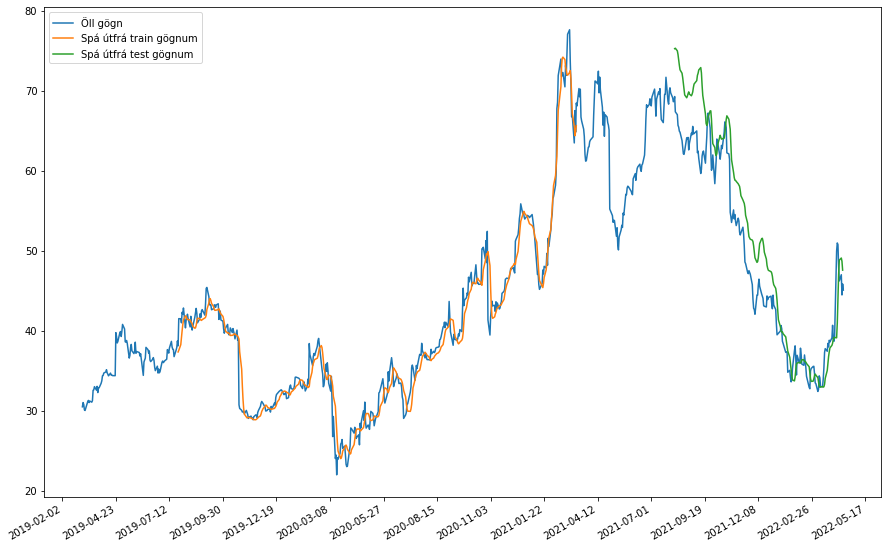

In [299]:
### Plotting 
# shift train predictions for plotting
look_back=100
allt = np.empty_like(df1)
allt[:, :] = np.nan
allt[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
trainspa = np.empty_like(df1)
trainspa[:, :] = np.nan
trainspa[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testspa=scaler.inverse_transform(df1)
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80))
scaler.inverse_transform(df1)
x_dates=data_dates
plt.plot(data_dates,testspa,label='Spá útfrá test gögnum')
plt.plot(data_dates,allt, label='Öll gögn')
plt.plot(data_dates,trainspa,label='Spá útfrá train gögnum')
plt.legend(['Öll gögn', 'Spá útfrá train gögnum','Spá útfrá test gögnum'],loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

### Framtíðargögn sett í fylki

In [300]:
len(test_data)

276

In [301]:
timi=len(test_data)-100


In [302]:
x_input=test_data[timi:].reshape(1,-1)
x_input.shape

(1, 100)

In [303]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [304]:
#temp_input

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = mod.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = mod.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [306]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [307]:
len(df1)

788

In [308]:
tim=len(df1)-100

### Mynd af spá ósamsett

In [309]:
#df1.shape

In [310]:
fdata = pd.concat([data, future_dates], axis=0)
framtid=fdata.index.to_frame().reset_index(drop=True)
framtid=framtid.apply(pd.to_datetime)
len(framtid)

819

In [311]:
spat=len(framtid)-30
sidf=len(framtid)-130

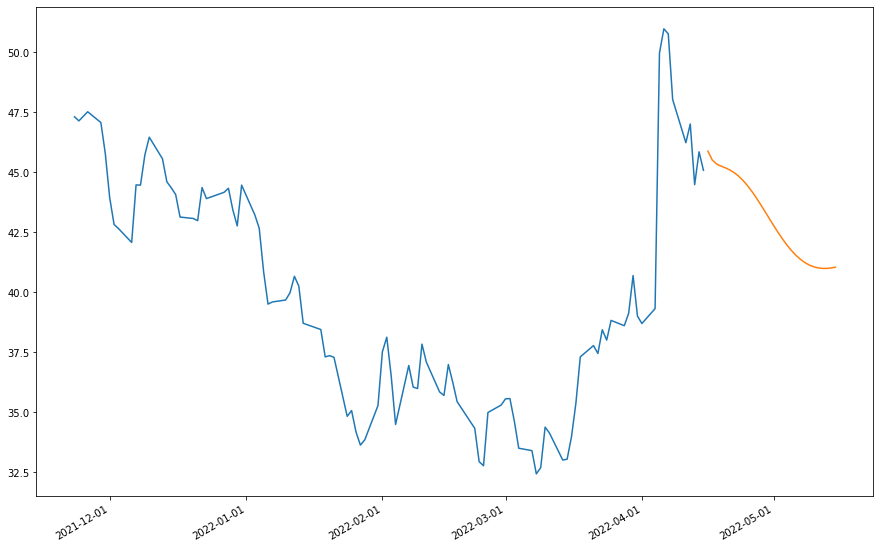

In [312]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=105))
plt.plot(framtid[sidf:spat],scaler.inverse_transform(df1[tim:]))
plt.plot(framtid[spat:],scaler.inverse_transform(lst_output))
plt.gcf().autofmt_xdate()

In [313]:
timm=tim+30

In [314]:
df3=df1.tolist()
df3.extend(lst_output)

In [315]:
laga=0
if len(framtid)!=len(df3):
  laga=len(framtid)-len(df3)


In [316]:
#islenskt=int(islenskt)

### Mynd af spá samsett

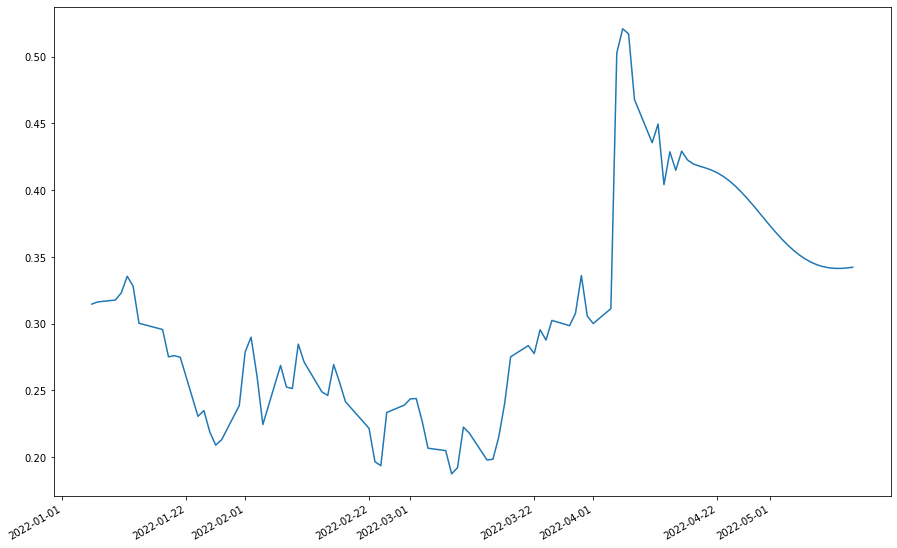

In [317]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=105))
plt.plot(framtid[timm+laga:],df3[timm:])
plt.gcf().autofmt_xdate()

In [318]:
df3=scaler.inverse_transform(df3).tolist()

### Mynd af heildargögnum með spá

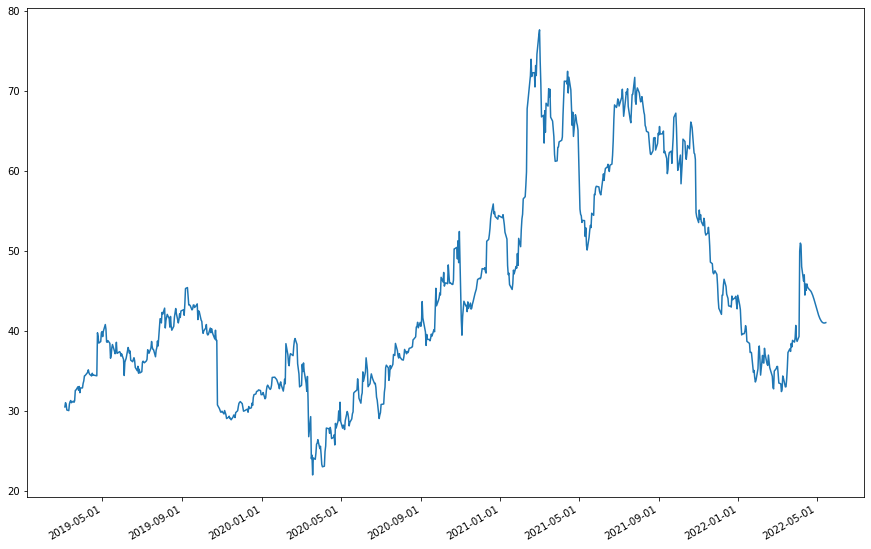

In [319]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=105))
plt.plot(framtid[laga:],df3)
plt.gcf().autofmt_xdate()

## Nett grafdót

In [320]:
data = yf.download(tickers=choice, period = 'max', interval = '1d', rounding= True)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.add_trace(go.Scatter(x=data.index,y=data['MA5'],opacity=0.7,line=dict(color='blue', width=2),name='MA 5'))

fig.add_trace(go.Scatter(x=data.index,y=data['MA20'],opacity=0.7,line=dict(color='orange', width=2),name='MA 20'))
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
#dict(count=15, label='15m', step='minute', stepmode='backward'),
#dict(count=45, label='45m', step='minute', stepmode='backward'),
#dict(count=1, label='1h', step='hour', stepmode='backward'),
#dict(count=6, label='6h', step='hour', stepmode='backward'),
dict(count=30, label='30d', step='day', stepmode='backward'),
dict(count=3, label='3m', step='month', stepmode='backward'),
dict(count=6, label='6m', step='month', stepmode='backward'),
dict(count=1, label='YTD', step='year', stepmode='todate'),
dict(count=1, label='1y', step='year', stepmode='backward'),
dict(count=3, label='3y', step='year', stepmode='backward'),
dict(step='all')
])
)
)
fig.show()

[*********************100%***********************]  1 of 1 completed
